In [1]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns

%matplotlib inline

In [2]:
#import dataset

df = pd.read_csv(r"C:\Users\sharm\Documents\Vaibhav Personal Project\Credit-Risk-Analysis\bank-loan-status-dataset\credit_train.csv")


In [3]:
df.describe()
df.shape


(100514, 19)

In [4]:
df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)



In [5]:
df = df.drop(["Months since last delinquent"],axis=1)

In [6]:
df.drop(df.tail(514).index, inplace=True) # drop last 514 rows


In [7]:
df.shape

(100000, 16)

In [8]:
for i in df['Maximum Open Credit'][df['Maximum Open Credit'].isnull() == True].index:
    df.drop(labels=i, inplace=True)

In [9]:
df.shape

(99998, 16)

In [10]:
for i in df['Tax Liens'][df['Tax Liens'].isnull() == True].index:
    df.drop(labels=i, inplace=True)

In [11]:
for i in df['Bankruptcies'][df['Bankruptcies'].isnull() == True].index:
    df.drop(labels=i, inplace=True)

In [12]:
df.shape

(99794, 16)

In [13]:
df["Credit Score"] = df["Credit Score"].apply(lambda val: (val/10) if val>850 else val)

In [14]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [15]:
temp = df[df["Credit Score"].notnull()]
mean1 = temp["Credit Score"].mean()
df["Credit Score"].fillna(np.round(mean1),inplace = True)

In [16]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,716.0,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,716.0,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [17]:
temp = df[df["Annual Income"].notnull()]
mean1 = temp["Annual Income"].mean()
df["Annual Income"].fillna(np.round(mean1),inplace = True)

In [18]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,716.0,1378339.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,716.0,1378339.0,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99794 entries, 0 to 99999
Data columns (total 16 columns):
Loan Status                  99794 non-null object
Current Loan Amount          99794 non-null float64
Term                         99794 non-null object
Credit Score                 99794 non-null float64
Annual Income                99794 non-null float64
Years in current job         99794 non-null object
Home Ownership               99794 non-null object
Purpose                      99794 non-null object
Monthly Debt                 99794 non-null float64
Years of Credit History      99794 non-null float64
Number of Open Accounts      99794 non-null float64
Number of Credit Problems    99794 non-null float64
Current Credit Balance       99794 non-null float64
Maximum Open Credit          99794 non-null float64
Bankruptcies                 99794 non-null float64
Tax Liens                    99794 non-null float64
dtypes: float64(11), object(5)
memory usage: 12.9+ MB


In [20]:
df["Years in current job"].value_counts()

10+ years    31090
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
n/a           4222
9 years       3949
Name: Years in current job, dtype: int64

In [21]:
#df.info()

In [22]:
df.replace(to_replace="n/a",value="10+ years",inplace=True)

In [23]:
df["Years in current job"].value_counts()

10+ years    35312
2 years       9104
3 years       8151
< 1 year      8114
5 years       6778
1 year        6436
4 years       6132
6 years       5676
7 years       5573
8 years       4569
9 years       3949
Name: Years in current job, dtype: int64

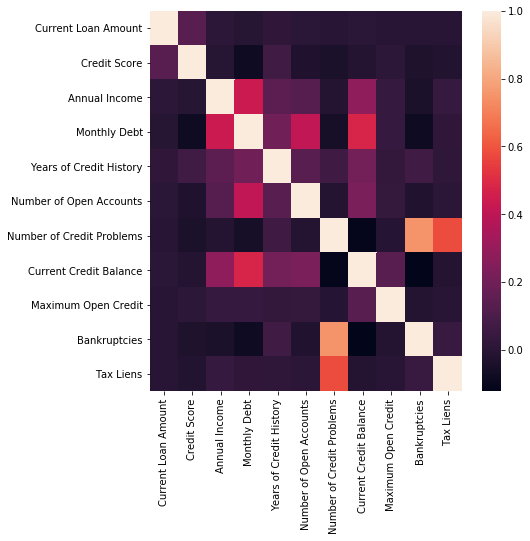

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())


In [25]:
df.corr()["Credit Score"]

Current Loan Amount          0.133848
Credit Score                 1.000000
Annual Income               -0.005122
Monthly Debt                -0.082107
Years of Credit History      0.069603
Number of Open Accounts     -0.026914
Number of Credit Problems   -0.042848
Current Credit Balance      -0.014504
Maximum Open Credit          0.012796
Bankruptcies                -0.031159
Tax Liens                   -0.018916
Name: Credit Score, dtype: float64

In [26]:
df['Years in current job'] = df['Years in current job'].str.extract(r"(\d+)")
df['Years in current job'] = df['Years in current job'].astype(float)

C:\Users\sharm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [27]:
categorical_subset = df[['Term', 'Home Ownership', 'Purpose']]

In [28]:
categorical_subset = pd.get_dummies(categorical_subset)


In [29]:
df.drop(labels=['Term', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
df = pd.concat([df, categorical_subset], axis = 1)

In [30]:
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,Fully Paid,445412.0,709.0,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,...,0,0,0,0,0,0,0,0,0,0
1,Fully Paid,262328.0,716.0,1378339.0,10.0,33295.98,21.1,35.0,0.0,229976.0,...,0,0,0,0,0,0,0,0,0,0
2,Fully Paid,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,...,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666.0,721.0,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,...,0,0,0,0,0,0,0,0,0,0
4,Fully Paid,176220.0,716.0,1378339.0,5.0,20639.70,6.1,15.0,0.0,253460.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    y = x['Loan Status']
    x = x.drop(labels = ['Loan Status'],axis=1)
    
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(labels = drops,axis=1)
    
    x['Loan Status'] = y
               
    return x

In [32]:
df = remove_collinear_features(df, 0.6);


In [33]:
df.head(20)

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status
0,445412.0,709.0,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
1,262328.0,716.0,1378339.0,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
2,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
3,347666.0,721.0,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
4,176220.0,716.0,1378339.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
5,206602.0,729.0,896857.0,10.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,...,0,0,0,0,0,0,0,0,0,Charged Off
6,217646.0,730.0,1184194.0,1.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
7,648714.0,716.0,1378339.0,1.0,14806.13,8.2,15.0,0.0,193306.0,864204.0,...,0,0,0,0,0,0,0,0,0,Charged Off
8,548746.0,678.0,2559110.0,2.0,18660.28,22.6,4.0,0.0,437171.0,555038.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
9,215952.0,739.0,1454735.0,1.0,39277.75,13.9,20.0,0.0,669560.0,1021460.0,...,0,0,0,0,0,0,0,0,0,Fully Paid


In [34]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income',
       'Years in current job', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Tax Liens',
       'Term_Long Term', 'Term_Short Term', 'Home Ownership_HaveMortgage',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Purpose_Business Loan', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_other',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Loan Status'],
      dtype='object')

In [35]:
df.head()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status
0,445412.0,709.0,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
1,262328.0,716.0,1378339.0,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
2,99999999.0,741.0,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
3,347666.0,721.0,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,Fully Paid
4,176220.0,716.0,1378339.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,Fully Paid


features = df.drop(labels=['Loan Status'],axis=1)
targets = pd.DataFrame(df['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [36]:
df.to_csv(r"C:\Users\sharm\Documents\Vaibhav Personal Project\Credit-Risk-Analysis\bank-loan-status-dataset\clean.csv")


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

# #Random Forest
random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

# # Logistic Regression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

# # XGBClassifier
xgb = XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=100)
xgb_cross = fit_and_evaluate(xgb)

print('XGB Performance on the test set: Cross Validation Score = %0.4f' % xgb_cross)

# SVM
svc = SVC()
svc_cross = fit_and_evaluate(svc)

print('SVM Performance on the test set: Cross Validation Score = %0.4f' % svc_cross)